In [1]:
import scanpy as sc
import os
import anndata as ad
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
sc.settings.verbosity=0 # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.n_jobs=4
sc.settings.set_figure_params(dpi=50, facecolor="white", frameon=False, figsize=(4,4))
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

%matplotlib inline




In [2]:
sc.settings.figdir = "sfig10"


In [3]:
PATH='/nfs/team298/ls34/fibroblast_atlas/fig1/adata_skin_gut_fetalonly.h5ad.integrated'
adata=sc.read_h5ad(PATH)
adata
rename = {"LTo_skin": "CCL19+_skin",
         "Other intestine": "Other_intestine"}
adata.obs["lto"]=adata.obs["lto"].map(rename).fillna(adata.obs["lto"])
adata.obs["lto"].unique()

adata
adata_skinccl19only = adata[adata.obs["lto"]=="CCL19+_skin"]

desired_order = ['CCL19+_skin', 'mLTo_intestine', 'Other_skin', 'Other_intestine']

adata.obs["lto"] = pd.Categorical(adata.obs["lto"], categories=desired_order, ordered=True)
lto_genes=['CCL19', 'CCL21', 'CXCL13',  'TNFSF11',  'VCAM1', 'RBP5', 'CD74', #'PTGDS', 'CTSH', 
           'C7',
          'ICAM1',  #'IL7',
           'FDCSP', 'IL33', 'SPNS2', 'MADCAM1',
          ]


/tmp/ipykernel_6218/1076916510.py:4: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_intestineccl19only.obs["DonorID_counts"] = adata_intestineccl19only.obs["DonorID"].apply(
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy

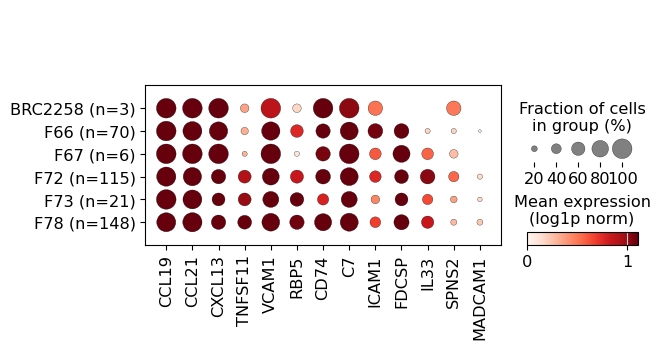

In [4]:
# adata.obs["lto"].unique()
# adata_intestineccl19only = adata[adata.obs["lto"]=="mLTo_intestine"]
# group_counts = adata_intestineccl19only.obs["DonorID"].value_counts()
# adata_intestineccl19only.obs["DonorID_counts"] = adata_intestineccl19only.obs["DonorID"].apply(
#     lambda x: f"{x} (n={group_counts[x]})"
# )
 

In [5]:
adata_lesional=sc.read_h5ad('/nfs/team298/ls34/disease_atlas/final_fb_adatas/adata_all_6150_umap5.h5ad.paga2.annotated11.lesionalonly')


/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(

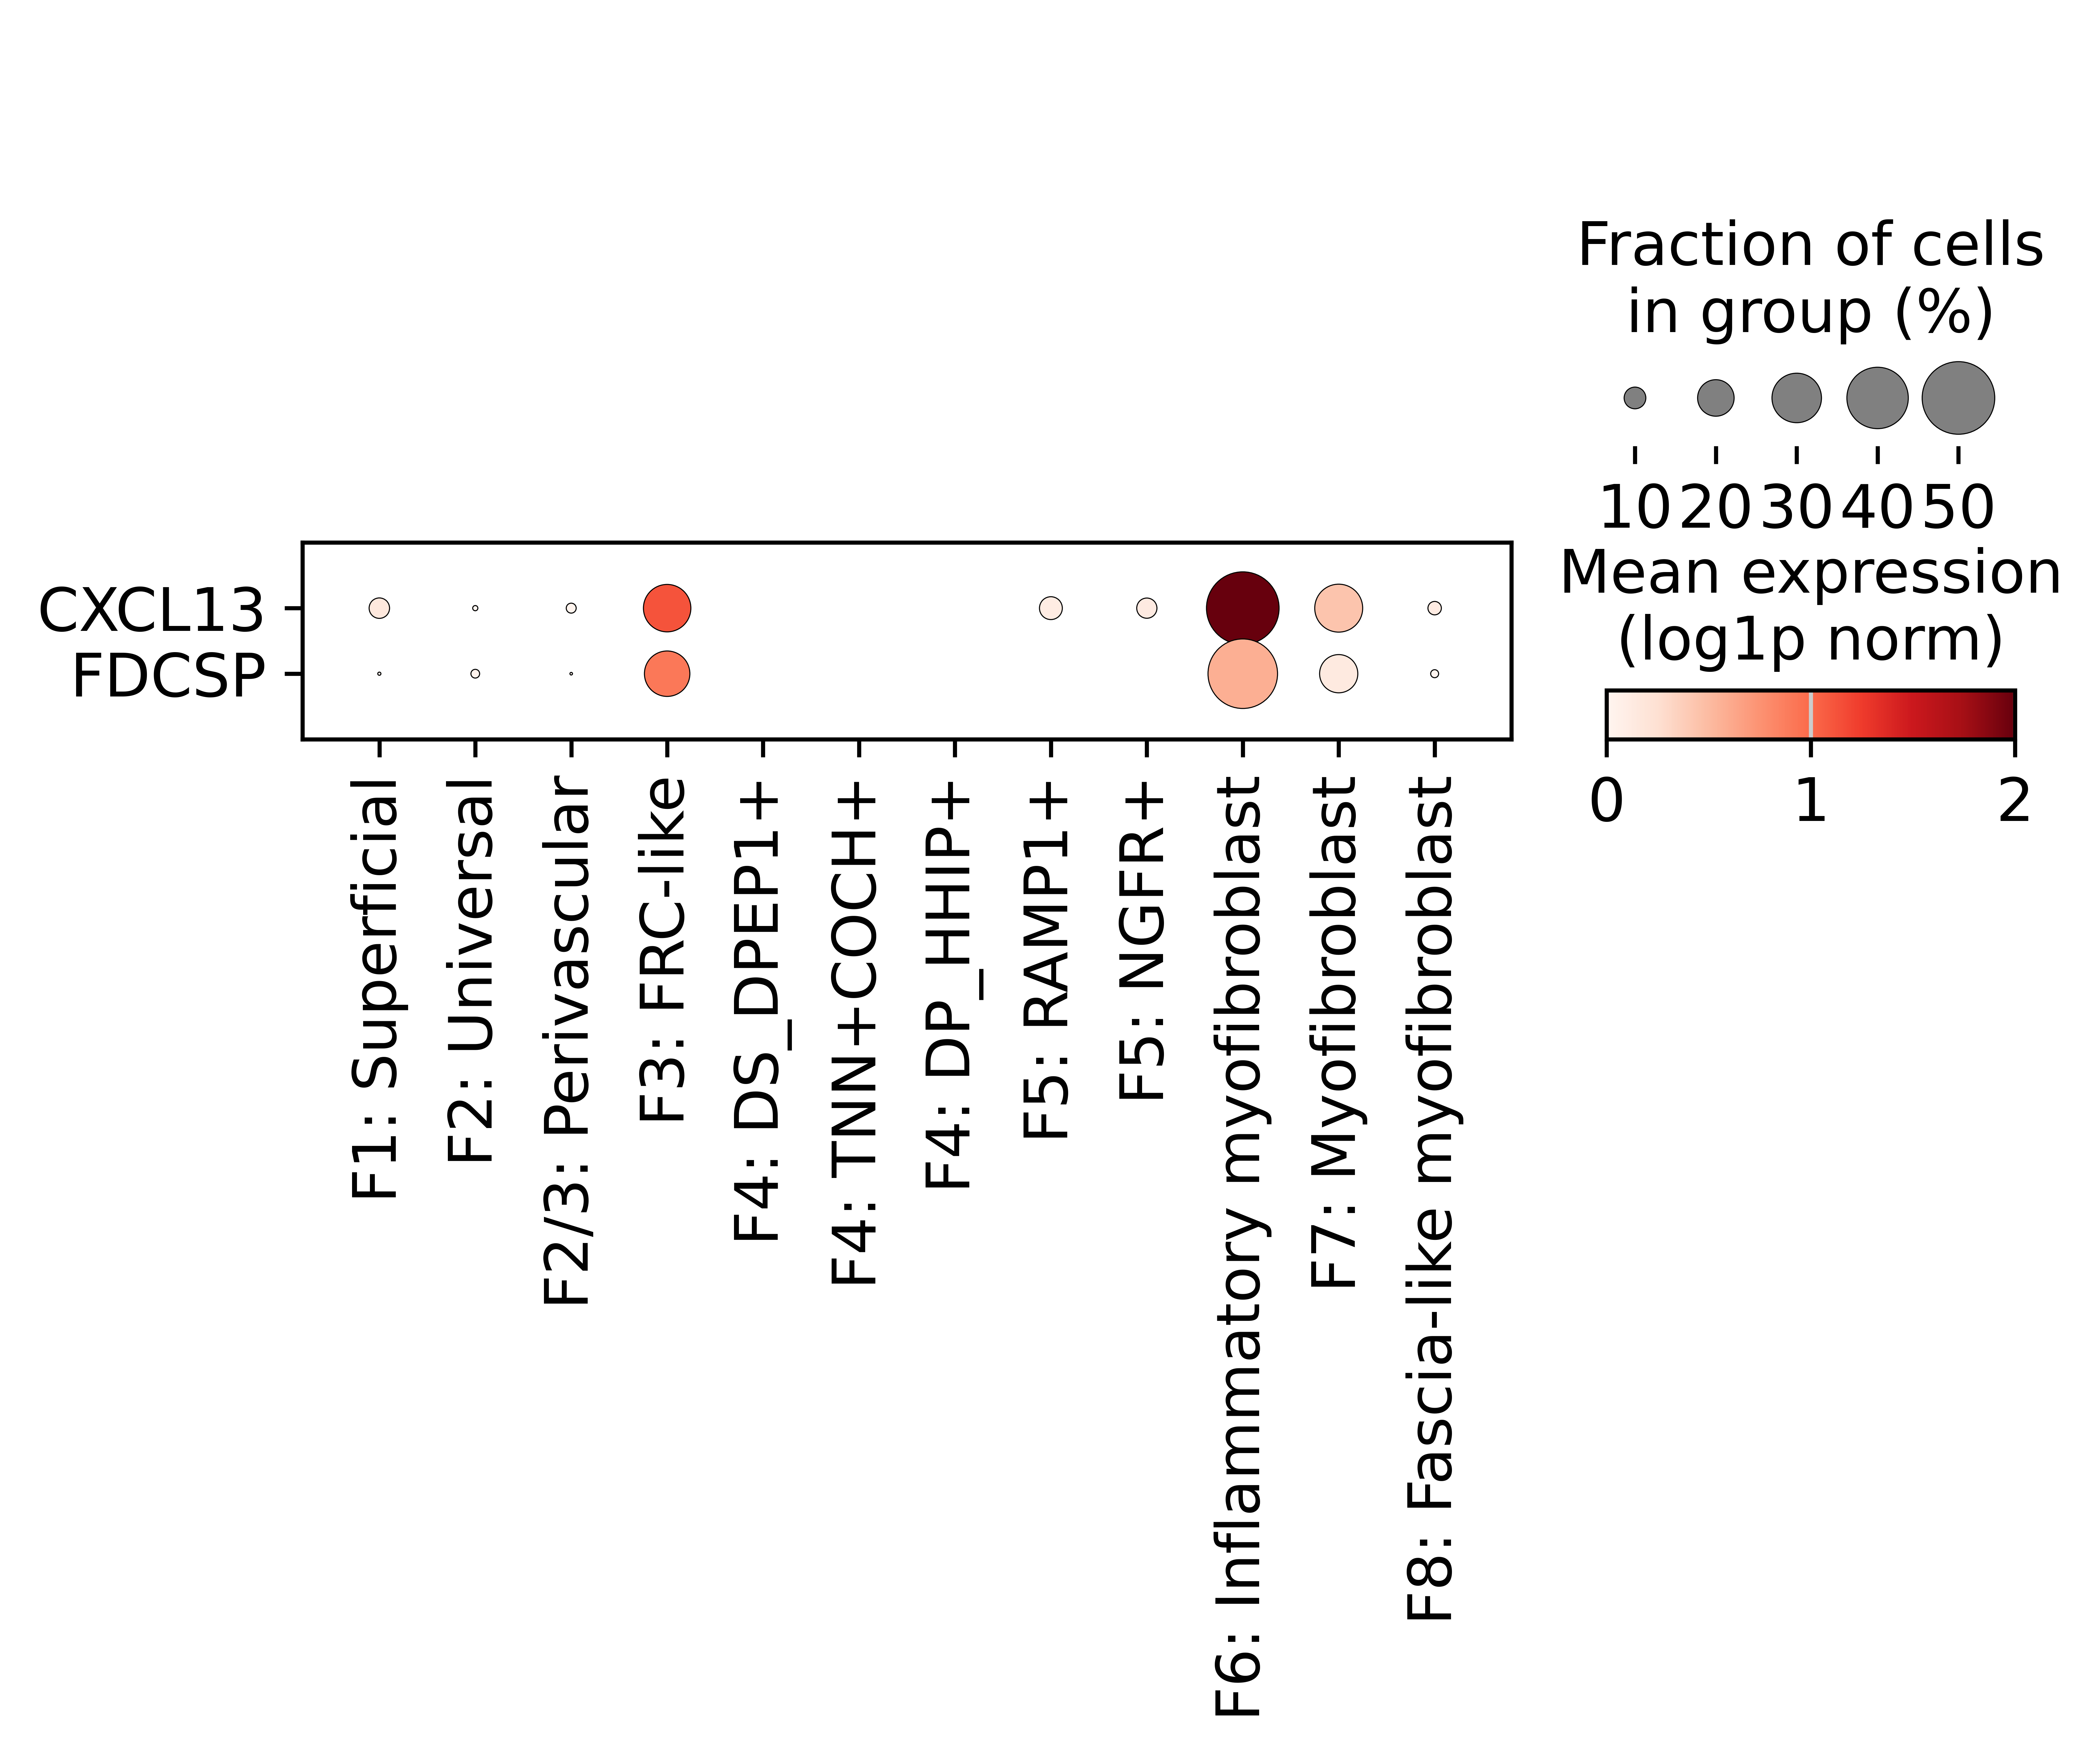

In [6]:
sc.settings.set_figure_params(dpi=600, facecolor="white", frameon=False, figsize=(4,4))
adata_lesional2=adata_lesional[adata_lesional.obs["Patient_status"]=="HS"]
sc.pl.dotplot(
    adata_lesional2,
    ["CXCL13", "FDCSP"], cmap="Reds",
    groupby="test13",vmax=2,colorbar_title='Mean expression\n(log1p norm)',
    #tandard_scale="var", 
    dendrogram=False,
    save="cxcl13_hs.png",
        swap_axes=True,
    dot_max=0.5,

)   


/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(

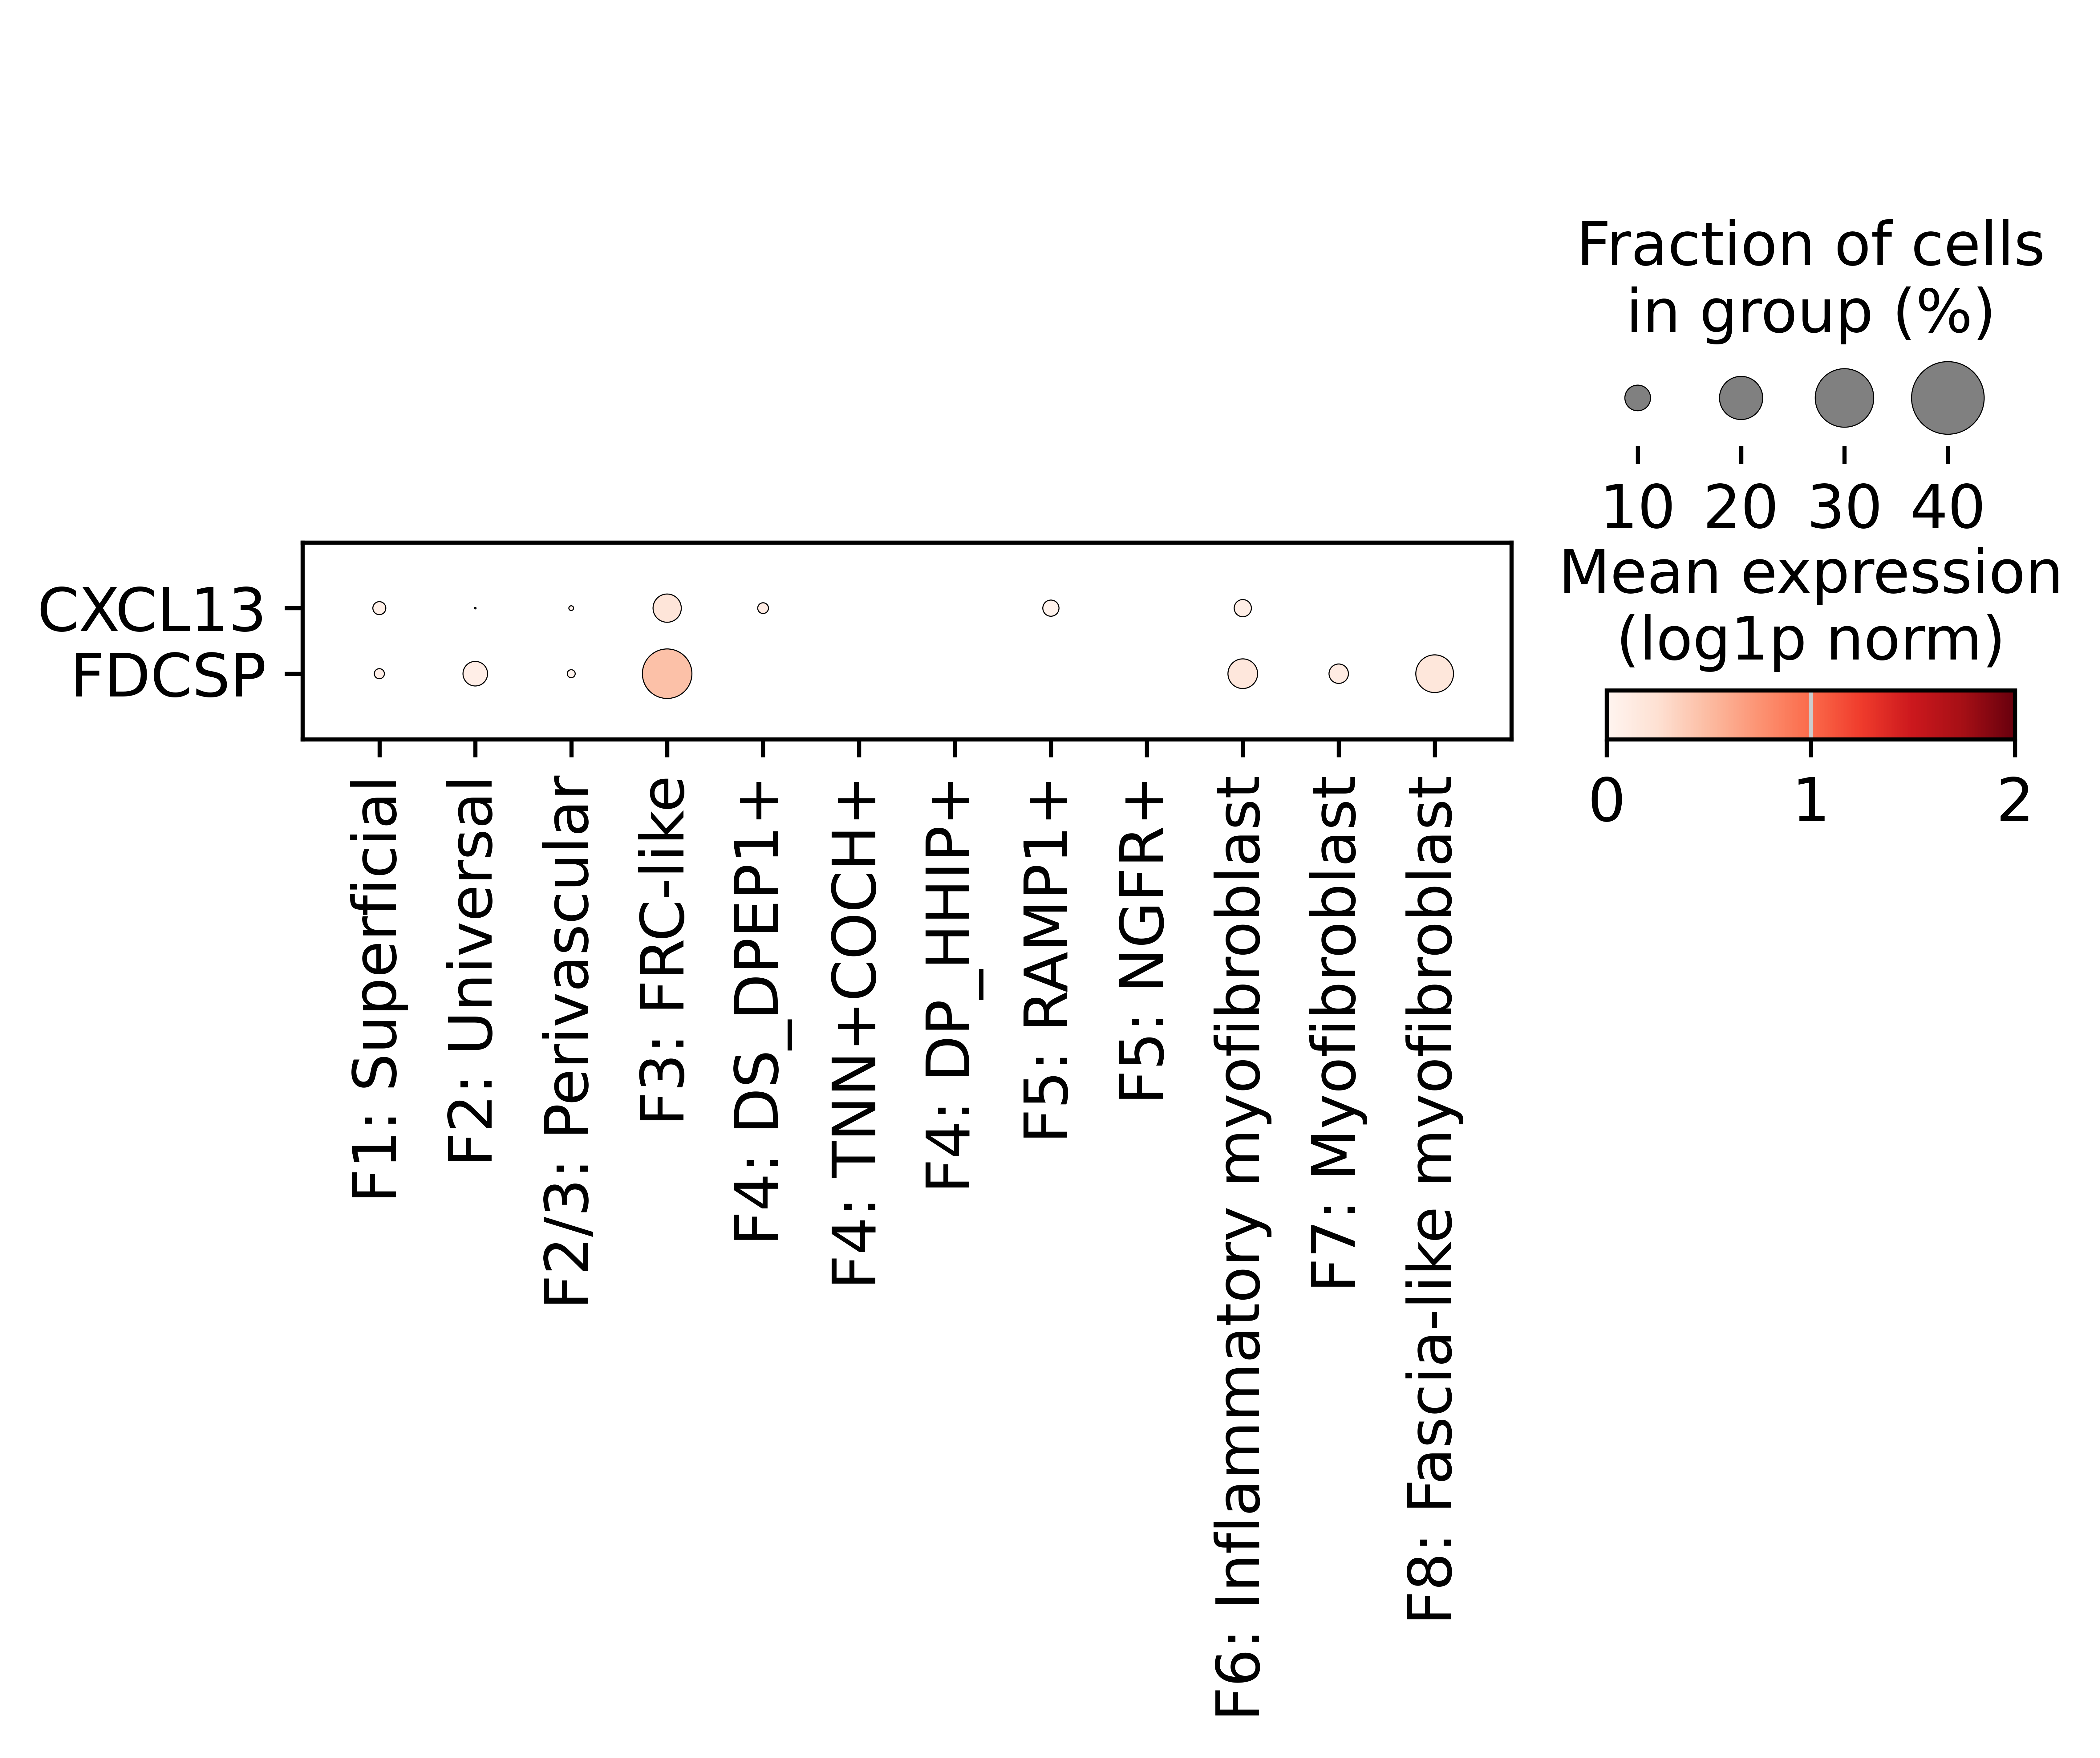

In [7]:
adata_lesional2=adata_lesional[adata_lesional.obs["Patient_status"]=="Sarcoidosis"]

sc.pl.dotplot(
    adata_lesional2,
    ["CXCL13", "FDCSP"], cmap="Reds",
    groupby="test13",vmax=2,colorbar_title='Mean expression\n(log1p norm)',
    #tandard_scale="var", 
    dendrogram=False,
    save="cxcl13_sarcoid.png",
        swap_axes=True,
    dot_max=0.4,

)   


/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(

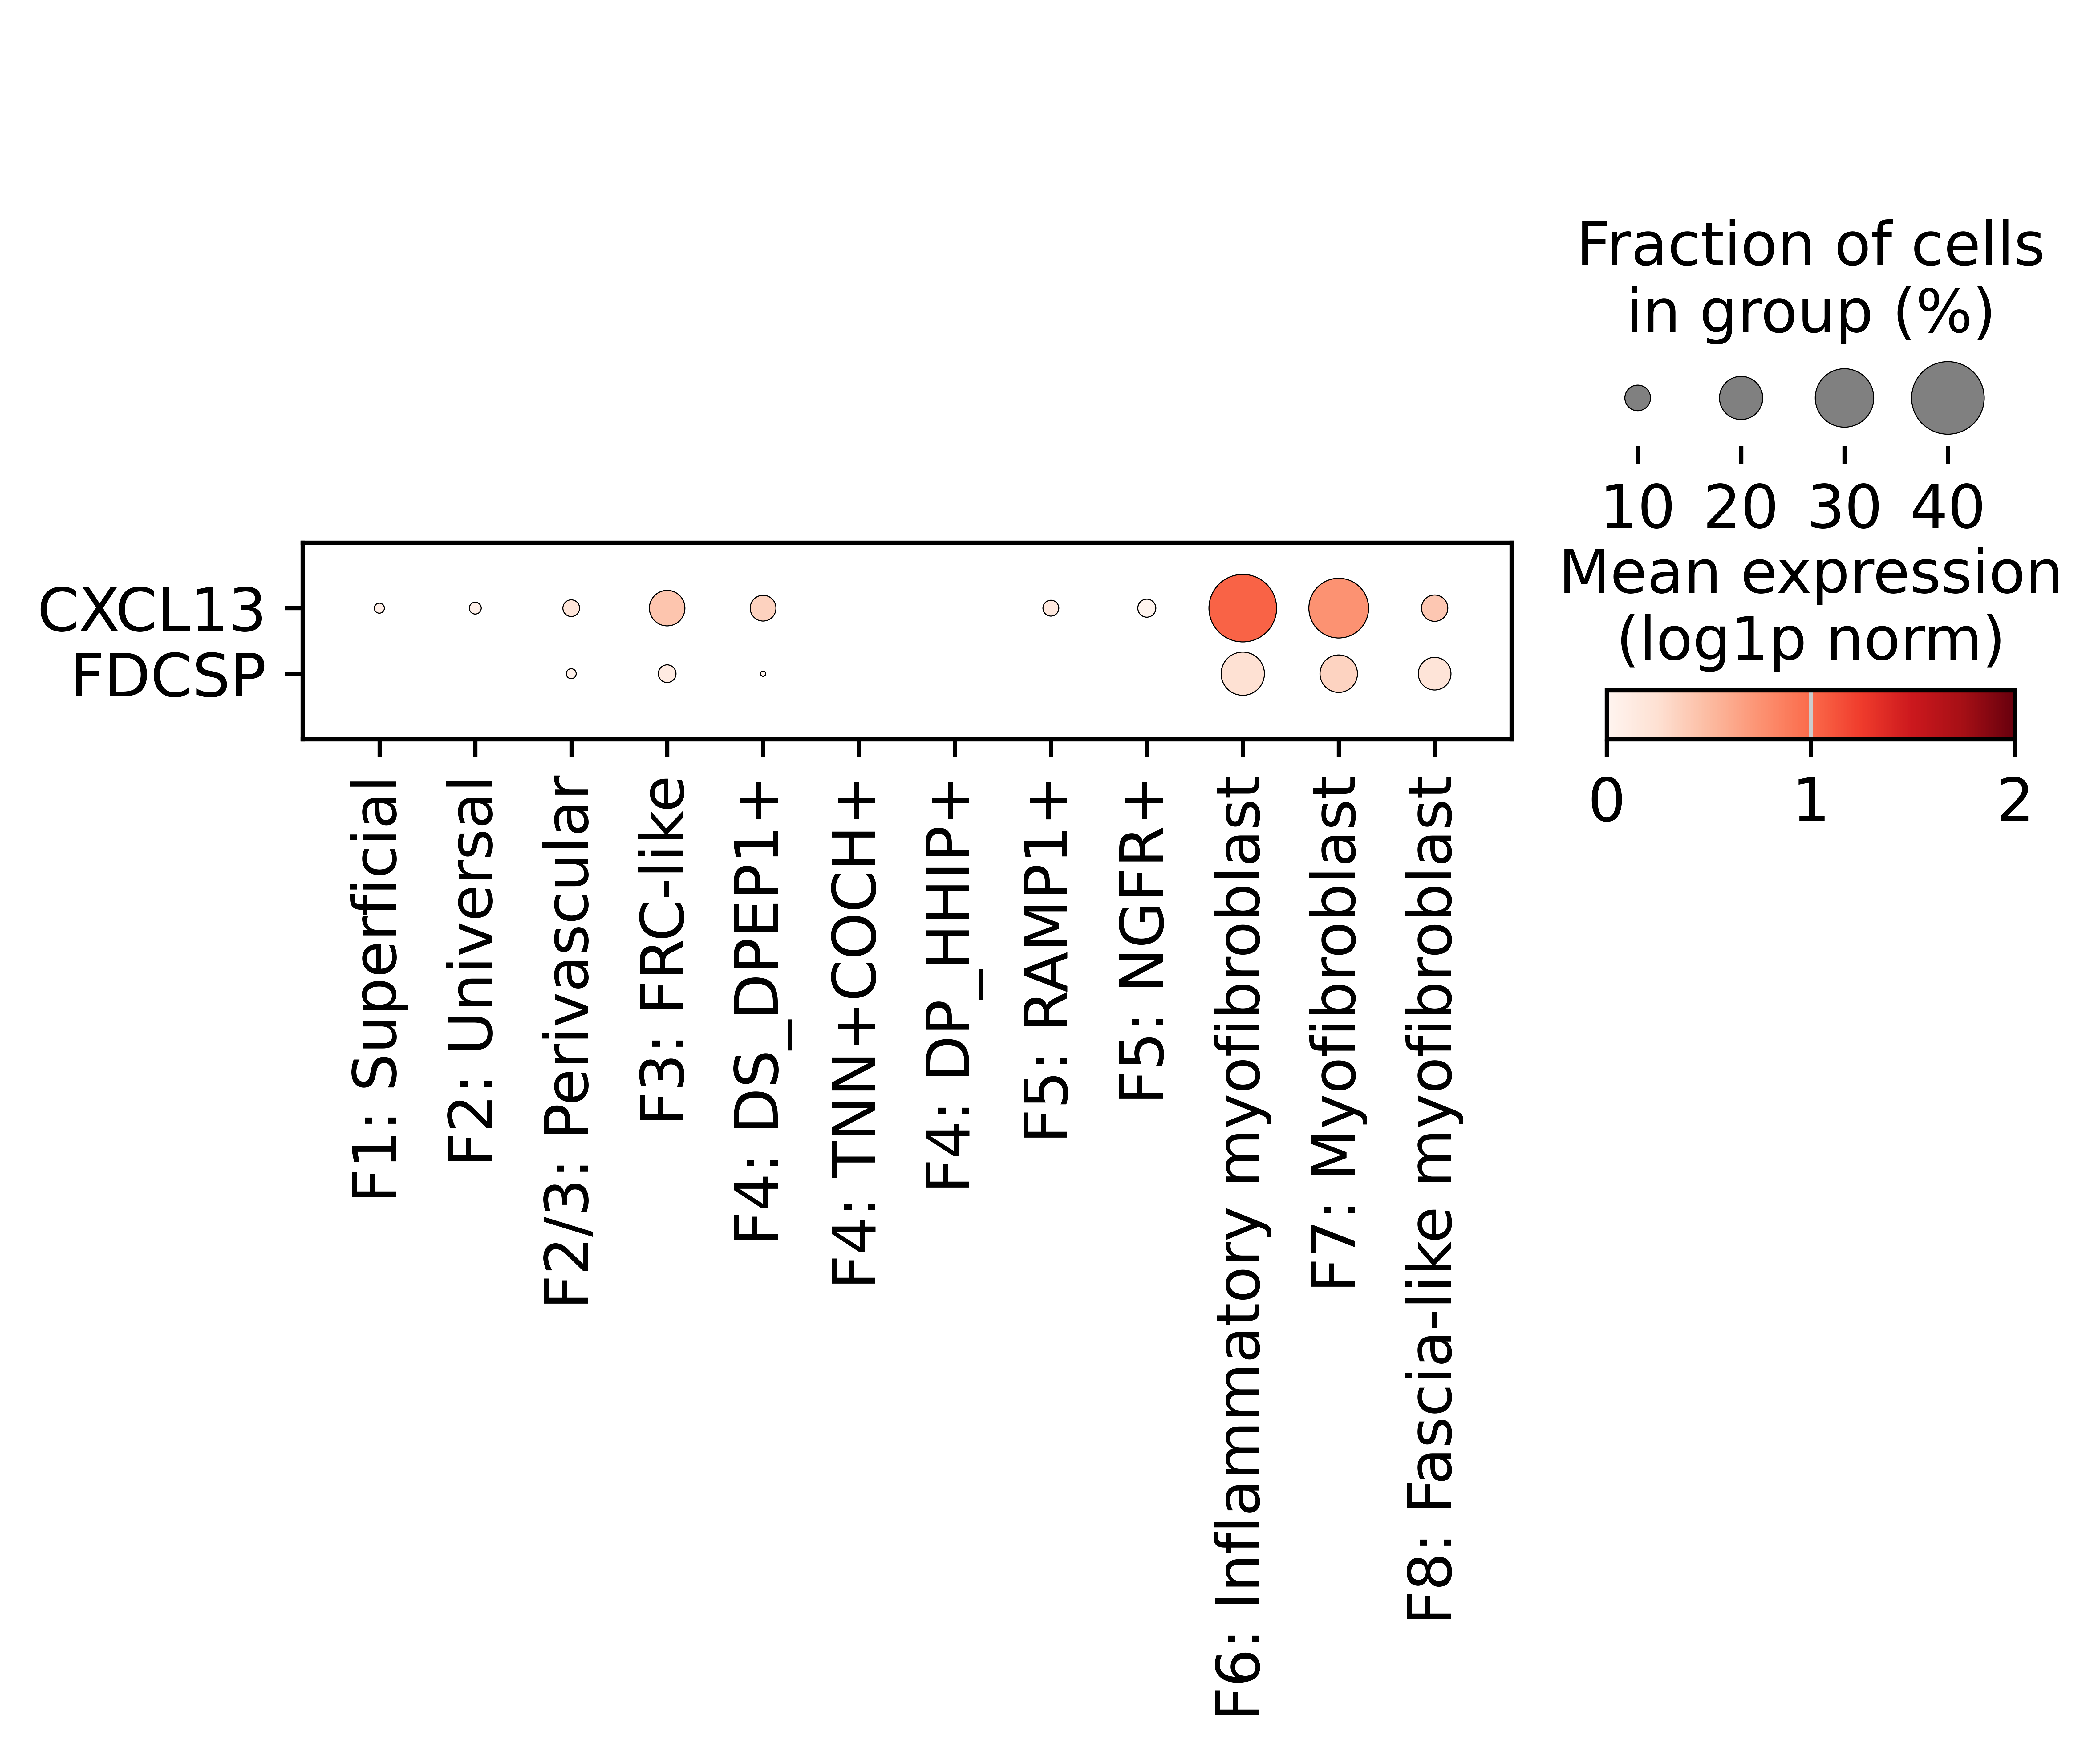

In [8]:
adata_lesional2=adata_lesional[adata_lesional.obs["Patient_status"]=="Acne"]

sc.pl.dotplot(
    adata_lesional2,
    ["CXCL13", "FDCSP"], cmap="Reds",
    groupby="test13",vmax=2,colorbar_title='Mean expression\n(log1p norm)',
    #tandard_scale="var", 
    dendrogram=False,
    save="cxcl13_acne.png",
        swap_axes=True,
    dot_max=0.4,

)   

